# Projeto Aplicado

# Analisando os dados do Airbnb do Rio de Janeiro



### Instalando pacote para o cálculo da Moda

In [1]:
install.packages('DescTools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Rcpp’, ‘Exact’, ‘gld’, ‘BH’




### Importação das bibliotecas (stringr para podermos trabalhar com string para permitir 'replace')

In [ ]:
library(DescTools)
library(tidyverse)
library(stringr)

### Realizando leitura e importação da base a ser utilizado

In [ ]:
df_listing = read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2022-06-20/data/listings.csv.gz")

### Nas próximas linhas faremos uma pequena exploração da base

In [ ]:
head(df_listing)

In [ ]:
summary(df_listing)

In [ ]:
str(df_listing)

In [9]:
dim(df_listing)

[1] 24881    74

## Objetivos e metas: Explorar a base buscando demonstrar itens da natureza abaixo 

##### Há presença de outliers? Sim ! Verificado em preco e quantidades de diarias  (poderia vir por ultimo essa pergunta..) 

##### Tempo de permanência médio (estadia), nao achei esta informacao , acho que podemos tirar essa pergunta do proximo  envio ja que estamos trabalhando mais frentes nas demais.. (sugestao) ou falar que nao tem essa info ... 

##### Existe correlação entre 2 atributos?  é possivel calcular mas nao é poissivel concluir se há uma relacao de causa e efeito 



#### Exibindo a quantidade de linhas e colunas



In [ ]:
nrow(df_listing)
ncol(df_listing)

### São dados contínuo ou discretos ?

Conforme é possível visualizar no str(df_listing) os atributos são diversos com a grande maioria sendo discreto. Poucos dados são contínuos como por exemplo latitute e longitude

### Quais os tipos de acomodação disponíveis.

#### Na análise abaixo fizemos algumas análises. Nelas identificamos 4 tipos de acomodações e destacamos. Fizemos a análise para representar a porcentagem que cada um possui em toda base além de apresentarmos o total de acomadações da base




In [ ]:
unique(df_listing$room_type)

In [ ]:
table(df_listing$room_type)


In [ ]:
total_quartos = sum(df_listing$room_type=="Shared room") +sum(df_listing$room_type=="Private room") +sum(df_listing$room_type=="Hotel room")+sum(df_listing$room_type== "Entire home/apt" )
total_quartos

In [ ]:
print('Total em porcentagem de Casa / Apartamento')
print((sum(df_listing$room_type== "Entire home/apt")/total_quartos)*100)

In [ ]:
print('Total em porcentagem de Quarto Hotel')
print((sum(df_listing$room_type=="Hotel room")/total_quartos)*100)

In [ ]:
print('Total em porcentagem de Quarto Privado')
print((sum(df_listing$room_type=="Private room")/total_quartos)*100)

In [ ]:
print('Total em porcentagem de Quarto Coletivo')
print((sum(df_listing$room_type=="Shared room")/total_quartos)*100)

### Preco: média, mediana e moda nos preços - por tipo de acomodação 

#### Em nossa análise foi identiicado que o campo "preço" esta em caracter, e para fazer a análise proposta foi necessário converter ele para número


In [ ]:
class(df_listing$price) #identificado que preco esta em caracter e nao em numeros 
df_listing$price 

In [ ]:
# Passo 1 - Substituindo $ por vazio
# Passo 2 - Substituindo , por vazio
df_listing$price2 = str_replace_all(str_replace_all(df_listing$price,"\\$",""),",","")
df_listing$price2

In [ ]:
# Após remover caracteres nao numericos, converte para numeric
df_listing$price2 = as.numeric(df_listing$price2)
df_listing$price2

In [ ]:
summary(df_listing$price2)

In [ ]:
#criando uma coluna chamada price2
df_listing.price2 = df_listing$price2

In [ ]:
ncol(df_listing)
names(df_listing)

In [ ]:
#utilizando o pacote DescTools vamos conseguir facilmente identificar o preço que mais aparece (moda) 
Mode(df_listing$price2)

In [ ]:
sd(df_listing$price2) #desvio padrao alto

In [ ]:
boxplot(df_listing$price2)            

In [ ]:
plot(df_listing$price2)     
 

#Média, mediana e moda nos preços - por tipo de acomodação 


casa ou apartamento inteiro

In [ ]:
#casa ou apartamento inteiro
summary((df_listing[df_listing$room_type == 'Entire home/apt', ])$price2)
print('a moda é:')
Mode((df_listing[df_listing$room_type == 'Entire home/apt', ])$price2) # nao consegui colocar na mesma linha 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    50.0    207.0    350.0    798.4    700.0 316450.0 

[1] "a moda é:"


[1] 250
attr(,"freq")
[1] 574

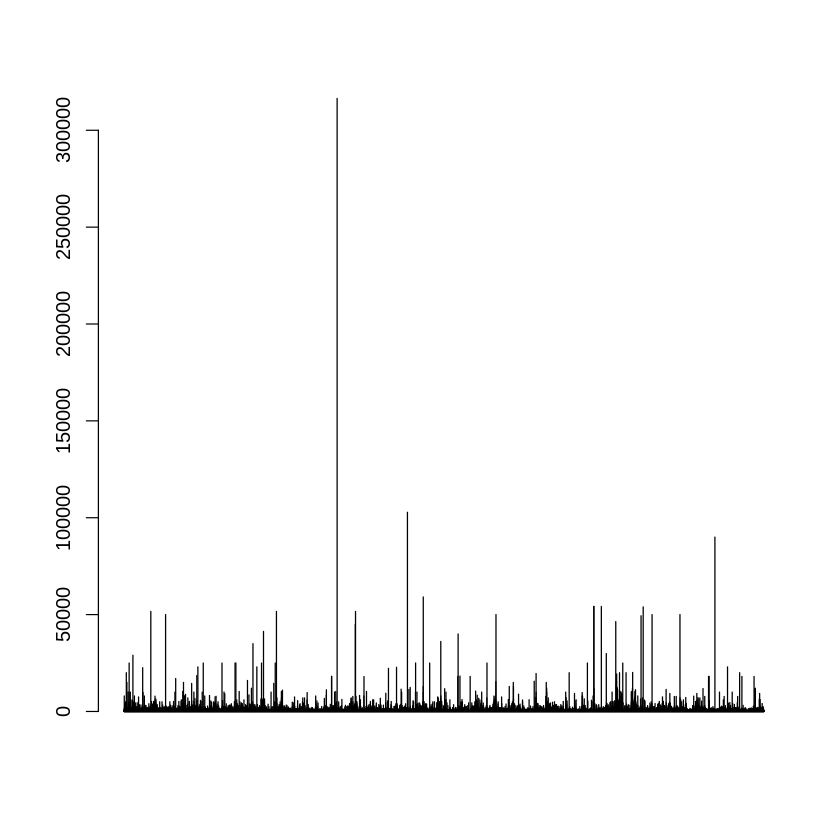

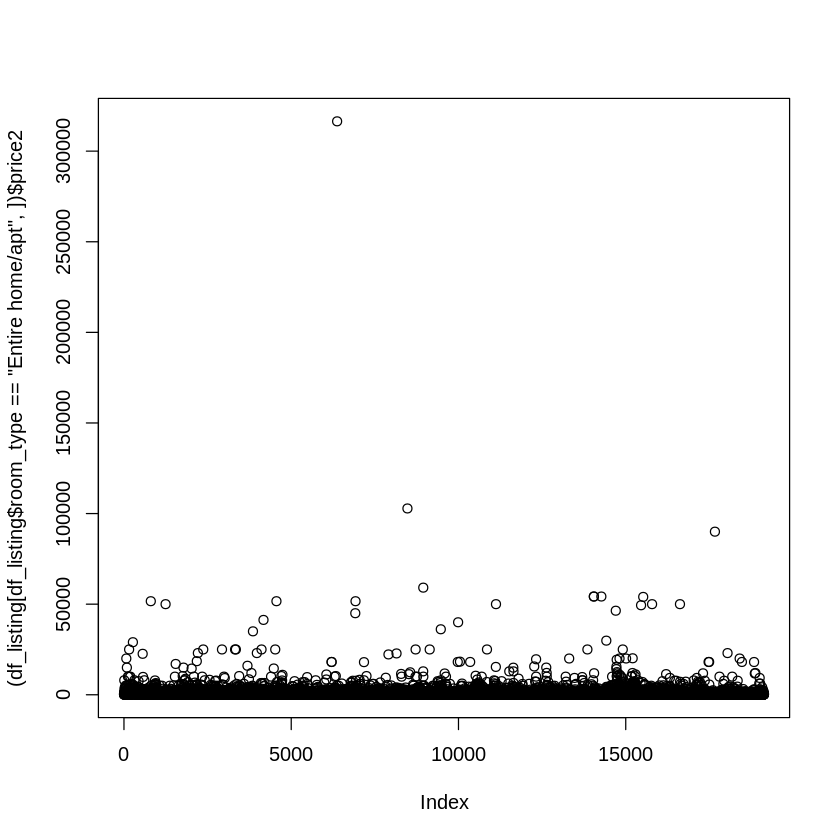

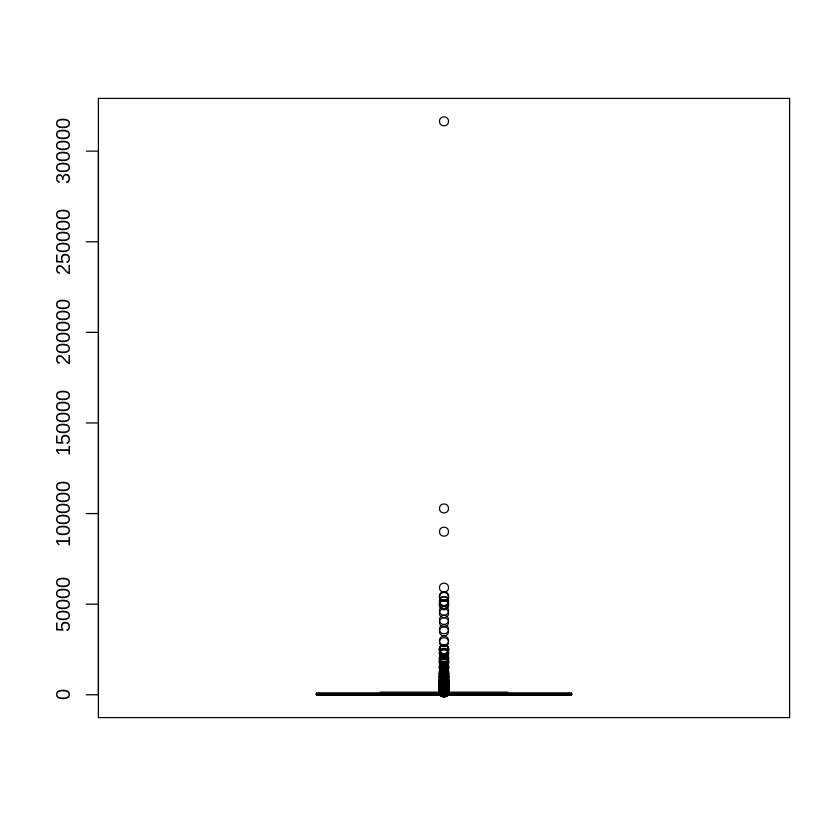

In [ ]:
barplot((df_listing[df_listing$room_type == 'Entire home/apt', ])$price2)
plot((df_listing[df_listing$room_type == 'Entire home/apt', ])$price2)
boxplot((df_listing[df_listing$room_type == 'Entire home/apt', ])$price2)

Quarto de hotel

In [ ]:
#Quarto de hotel
summary((df_listing[df_listing$room_type == "Hotel room", ])$price2)
print('a moda é:')
Mode((df_listing[df_listing$room_type == "Hotel room", ])$price2) # nao consegui colocar na mesma linha  
(df_listing[df_listing$room_type == "Hotel room", ])$price2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   154.0   294.0   975.6   480.0  9999.0 

[1] "a moda é:"


[1] 0
attr(,"freq")
[1] 7

[1]  257  214  179 9999  804  613  329  160  643  386 1492  200  579    0  220
[16]  197  479  563  436   85  229  481  206  101 9999  684  159  340 9713   71
[31]  206  613    0  159   90 9999  317  350   85    0 6988    0  149  402  183
[46]  145  597    0  365    0  498  365  176   71   65  160   65  176  334  294
[61]  370  440  686  365    0  472  365

In [ ]:
nrow(df_listing$room_type == "Hotel room") # nao entendi a moda ser zero! esse valor é oq ue mais aparcece?  nao consigo ver a quantidade de linhas desse atributo 

NULL

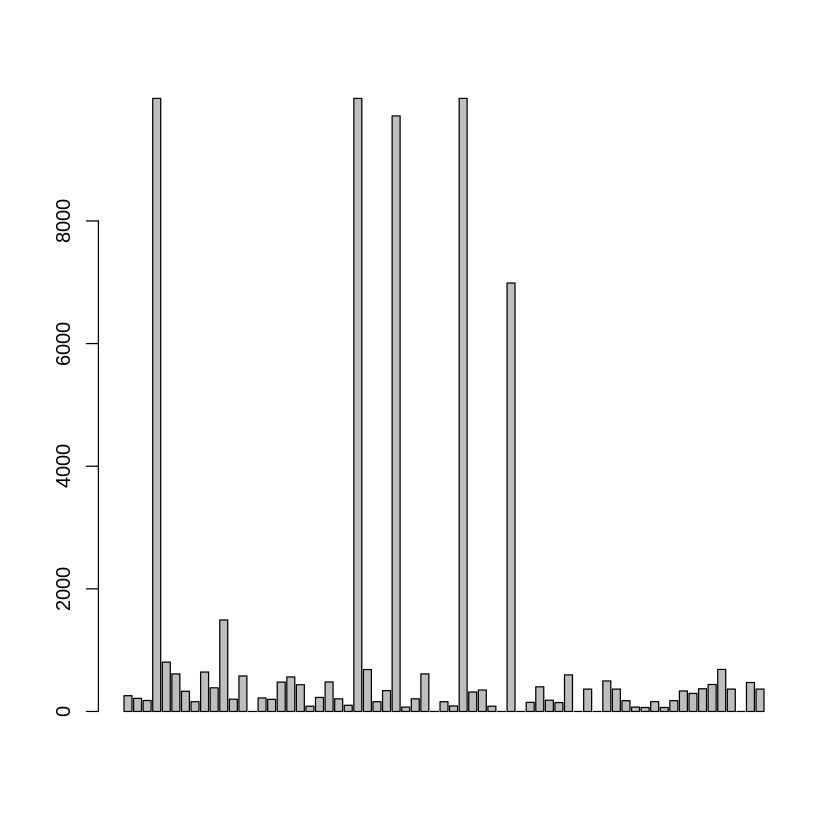

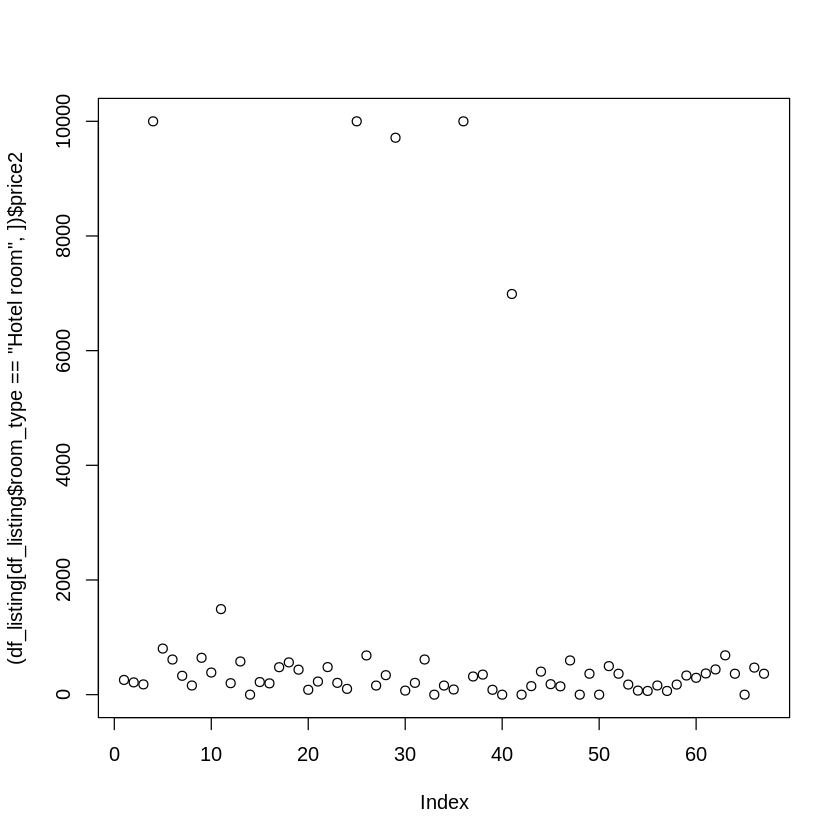

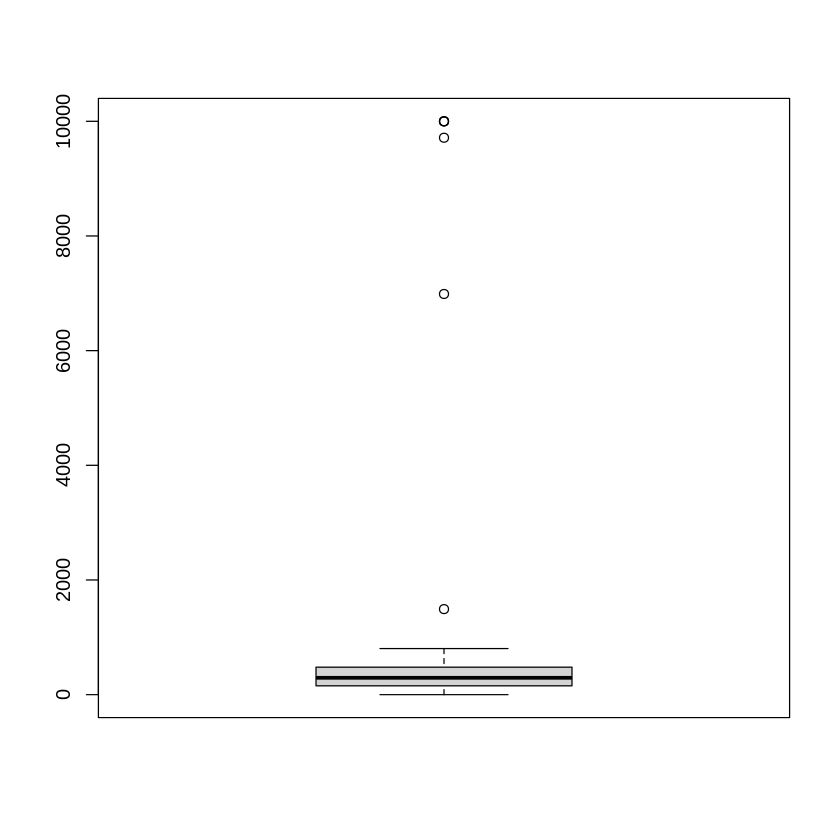

In [ ]:
barplot((df_listing[df_listing$room_type == "Hotel room", ])$price2)
plot((df_listing[df_listing$room_type == "Hotel room", ])$price2)
boxplot((df_listing[df_listing$room_type == "Hotel room", ])$price2)

Quarto privativo

In [ ]:
#Quarto privativo
summary((df_listing[df_listing$room_type == 'Private room', ])$price2)
#Mean((df_listing[df_listing$room_type == 'Private room', ])$price2)
#Median((df_listing[df_listing$room_type == 'Private room', ])$price2)
print('a moda é:')
Mode((df_listing[df_listing$room_type == 'Private room', ])$price2) # nao consegui colocar na mesma linha 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    33.0    108.0    180.0    458.8    310.0 130000.0 

[1] "a moda é:"


[1] 150
attr(,"freq")
[1] 265

In [ ]:
(df_listing[df_listing$room_type == 'Private room', ])$price2  #olhando a lista de precos


[1]    150    180    500    200    220    700    120     70     51     56
  [11]    773    180    300    377    773    250    155     50    126    300
  [21]     80   2500     75   1300     82   3000    300    140    140    195
  [31]  51627     90     90    120    200    207    110    105    250    336
  [41]    210    150     75     99    159    350    250    110    300     54
  [51]    120    250    150    145   1000     79     70    150    135    108
  [61]    955    240    250     80    190    700     70    150    379    130
  [71]     95    120    230    717    200     60    779    150    140    180
  [81]    400    160    110    443    267    150    150    233     60    400
  [91]    114     96     54    189     71    100     74    120     85    100
 [101]    106    298    210    150    207     99    180    500    230     55
 [111]    150    202    150    429    180     83    200    350   3141    516
 [121]   5000    100   1291     96    350    196    203    350    200    250
 [131]    100    516    100    217    336    200    293    250    250    102
 [141]   1000    924     54     99    400    595    128    150    400    100
 [151]     65    291    282     73     70    169     70    100    120    120
 [161]    318     71    200     72     95    200    150    220    850    750
 [171]    600    200     65    299    100    120    157    300    350    150
 [181]    350    120    164     80    750    620    575    200    174    330
 [191]     75    248    200    170   1033    118    114    200    190    960
 [201]    250    387    220    100    432    150    100    150     55    125
 [211]    530     90    181     80    280    164    250    190    310    174
 [221]    227    155    401    220    790    180    250    425    150   1291
 [231]     43    700    149    174    906    104    110    120    300    130
 [241]   1200     80     58     70    120    150     64  10000     90    200
 [251]    400    207    106    250     70     85    400   1000    387    150
 [261]    207    790    100    217    600    150    413    180     80   1027
 [271]    300     60    774    144    739    120    500    100    100    180
 [281]    278    121    463    259    207   1033    350    107    361    232
 [291]    139   1291     89    207    270    500    200     53     85    350
 [301]    150    700    800    130    213     86     96    180   1136    170
 [311]    600     88    300    250    118    516    200    450    586     95
 [321]    160    258    310    140     96    387    246    185    320   2000
 [331]    155    250     55    600    204    100     60    457    295    190
 [341]    465    190     60    300    133    150    717    495     89    170
 [351]    100     70    230    150    108    450    120    158    175    448
 [361]    127    110    500    150    800   1000    515     90    100    160
 [371]    420    450    100     61   1001   5000    100    336    489    774
 [381]    272    133     70    257    179    299    368    400    155    250
 [391]    230    200    120    380  25000    250    382    139   1719    130
 [401]    300    200    516     99    300    140    300   1000     66   1000
 [411]    150    150   1368    119    543    516    150    459    183    413
 [421]    774    350    200    136     56    150    110    730    600    310
 [431]    136   3035    700     65    188    200    207    350    300    214
 [441]  20000    327    174     98    268    258    100     97     73    186
 [451]    270    220    206    170     65    179    130     92    200    343
 [461]    245     90     70     80    150     72    148    929    500     96
 [471]    109    388   1000     87    160    200    150    300    210    210
 [481]    210    300    129    136     70     98    199    199    250    132
 [491]    200     70    186    155    230    170    700    200   1807    400
 [501]    180     80     80    826    250   1000    336    201    413     60
 [511]    250    500    300    671     51    155    100    350    149     83

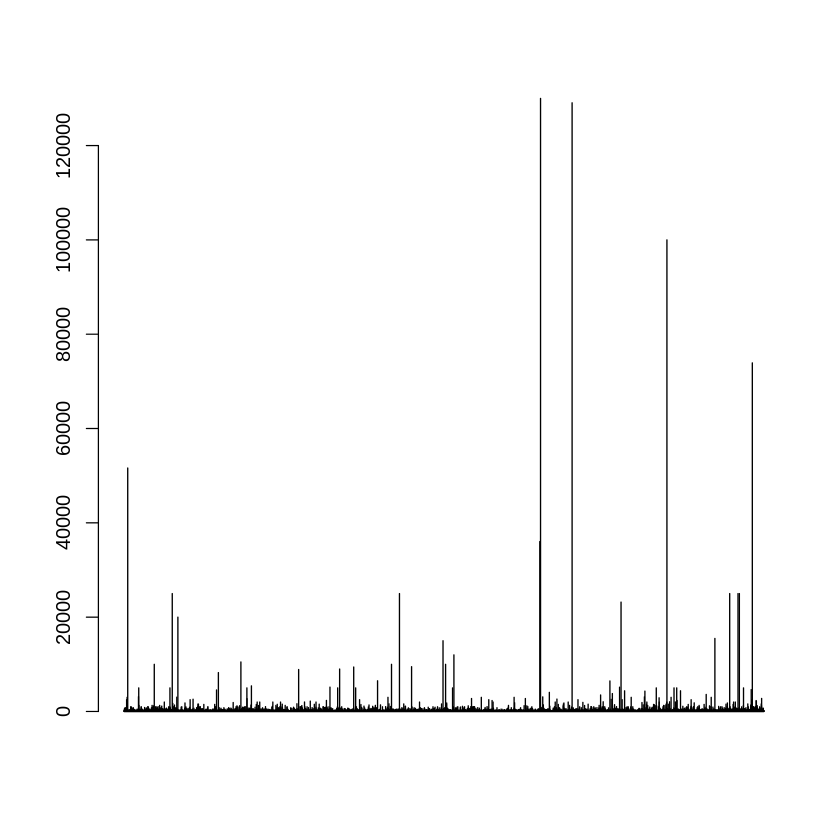

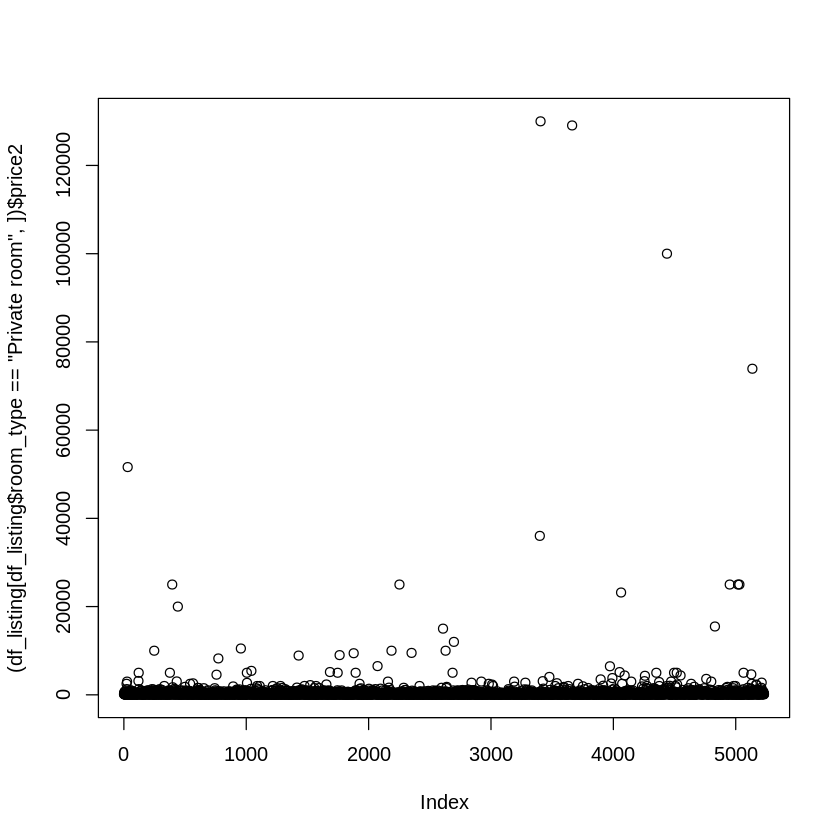

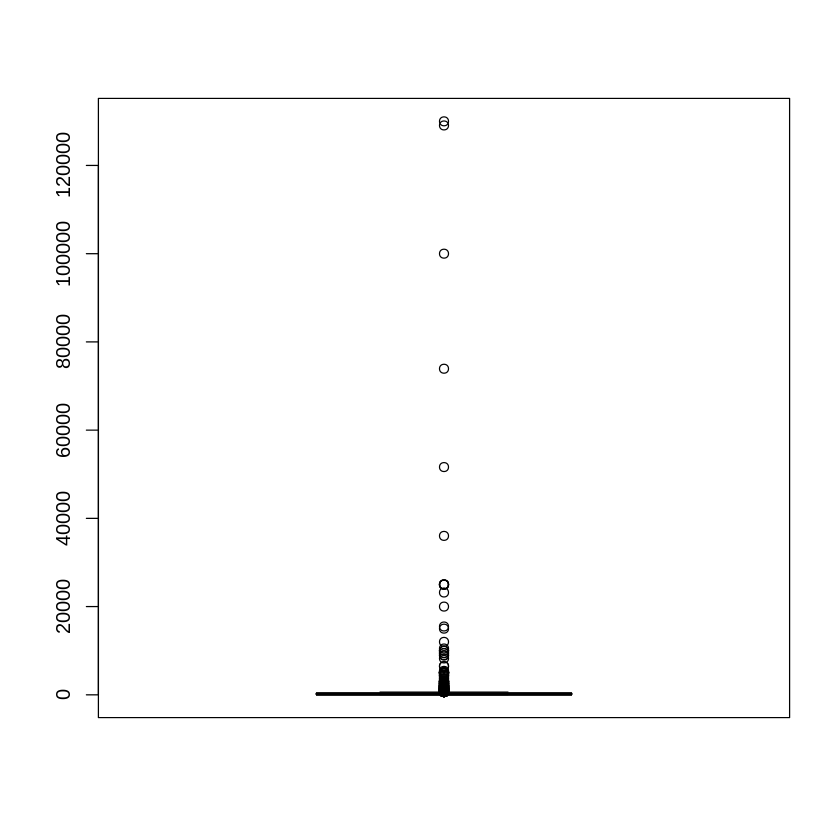

In [ ]:
barplot((df_listing[df_listing$room_type == 'Private room', ])$price2)
plot((df_listing[df_listing$room_type == 'Private room', ])$price2)
boxplot((df_listing[df_listing$room_type == 'Private room', ])$price2)

In [ ]:
#Quarto compartilhado 
summary((df_listing[df_listing$room_type == 'Shared room', ])$price2)
print('a moda é:')
Mode((df_listing[df_listing$room_type == 'Shared room', ])$price2) # nao consegui colocar na mesma linha 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    34.0     68.2    100.5   1789.6    200.0 591723.0 

[1] "a moda é:"


[1] 50
attr(,"freq")
[1] 23

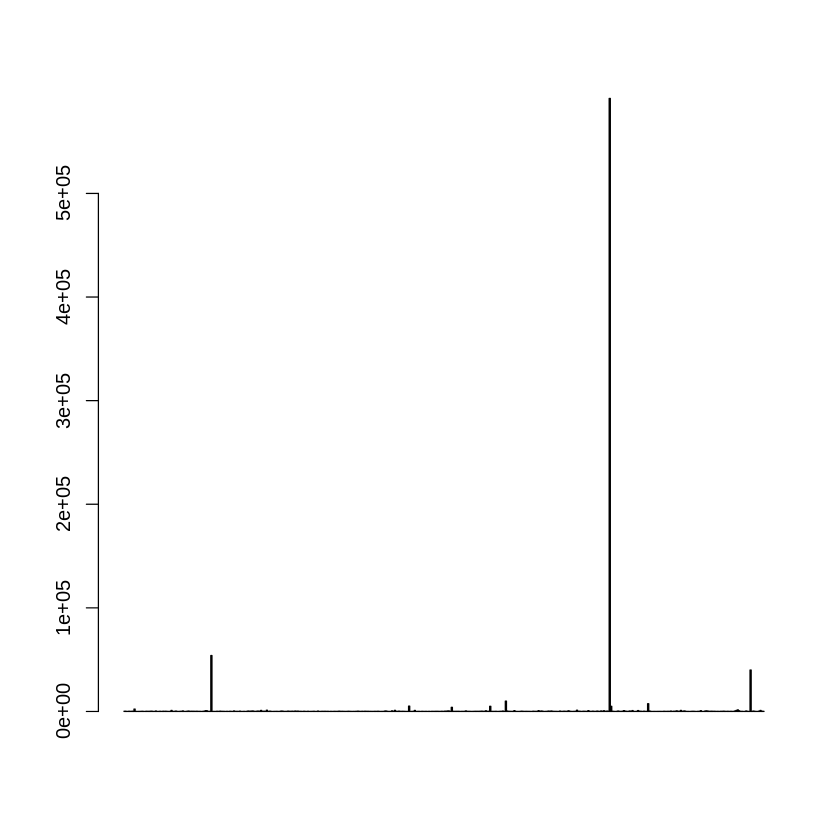

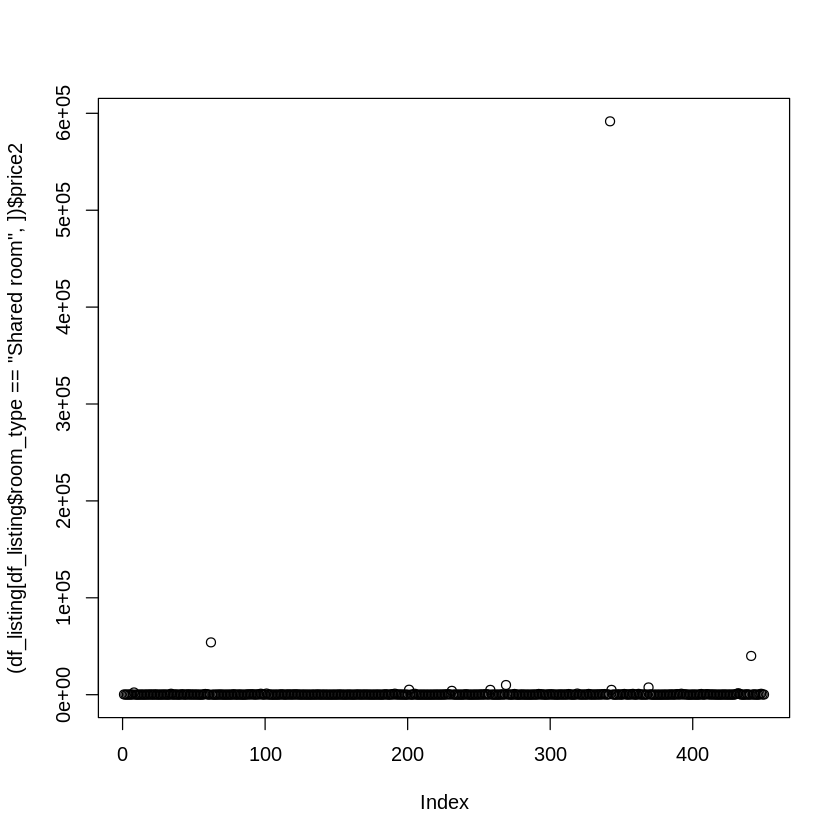

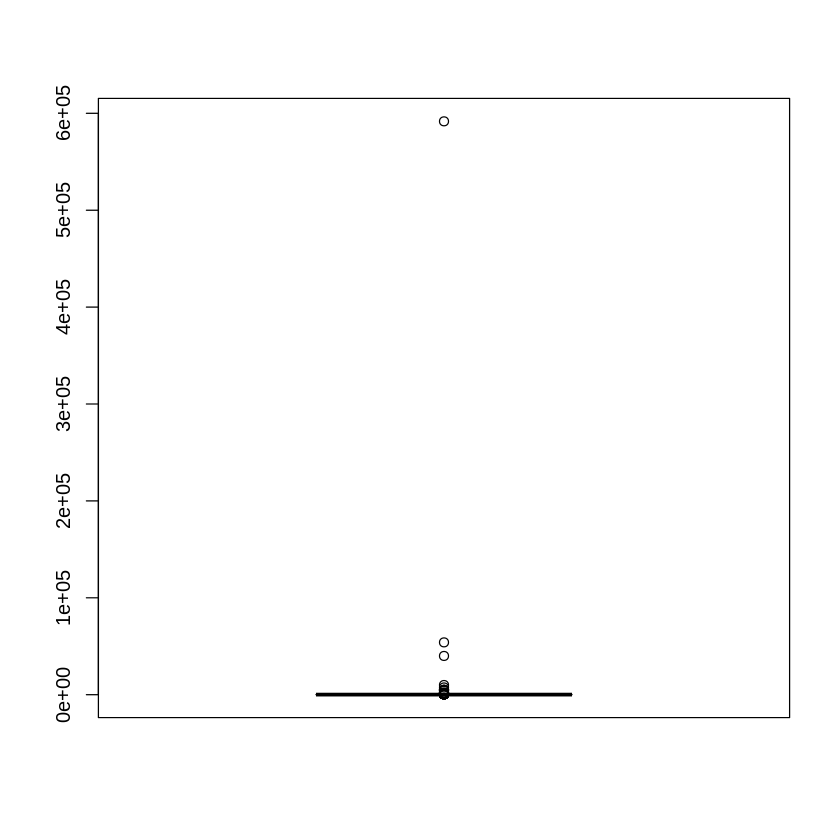

In [ ]:
barplot((df_listing[df_listing$room_type == 'Shared room', ])$price2)
plot((df_listing[df_listing$room_type == 'Shared room', ])$price2)
boxplot((df_listing[df_listing$room_type == 'Shared room', ])$price2)

# Avaliando minimo e maximo de noites




Minimo de noites

In [ ]:
summary(df_listing$minimum_nights)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    2.000    5.358    4.000 1125.000 

In [ ]:
#utilizando o pacote DescTools vamos conseguir facilmente identificar qual o valor que mais aparece entre as opcoes de minimo de noites  (moda) 
Mode(df_listing$minimum_nights)

[1] 2
attr(,"freq")
[1] 6381

In [ ]:
table(df_listing$minimum_nights)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
6308 6381 5275 1952 1833  307  983   68   19  448    6   22   16   58  319    3 
  17   18   19   20   21   22   23   24   25   27   28   29   30   31   32   34 
   6    6    7  133   15    6    2    3   23    2   53    9  343   13    1    1 
  35   36   40   50   52   55   56   60   78   80   85   90   93   95   99  100 
   1    1    3    2    1    2    1   32    1    1    1  112    1    1    1    5 
 109  110  120  150  158  180  182  184  200  210  240  300  360  365  400  500 
   1    1   12    2    1   19    1    2    3    1    1    3    8   27    1    1 
 630  730  960  999 1000 1125 
   1    1    1    3    3    1 

In [ ]:
sd(df_listing$minimum_nights)

[1] 26.04411

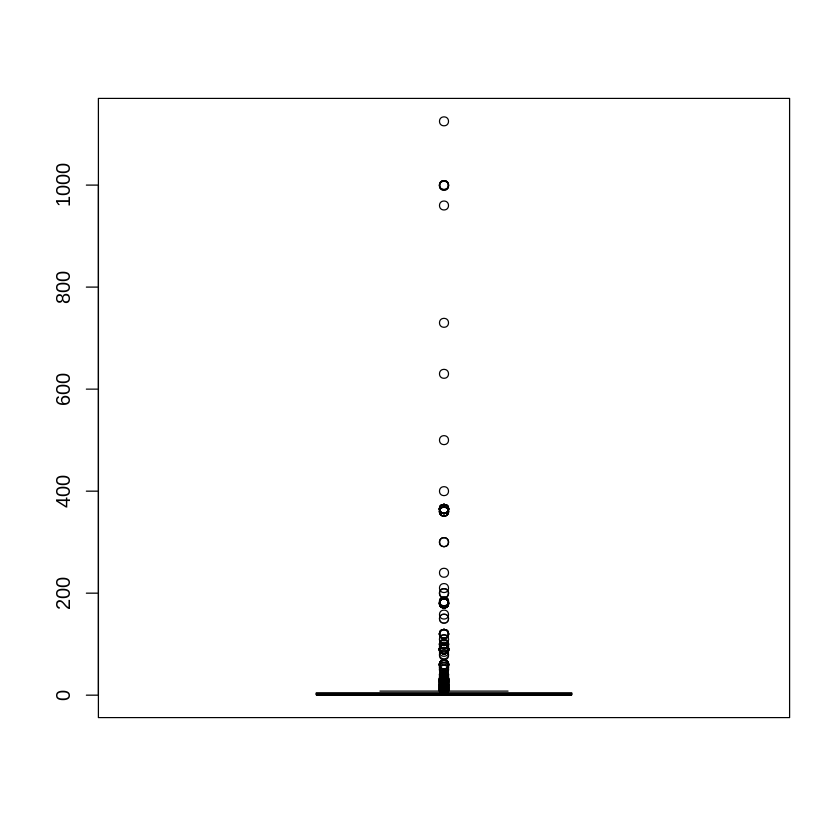

In [ ]:
boxplot(df_listing$minimum_nights)

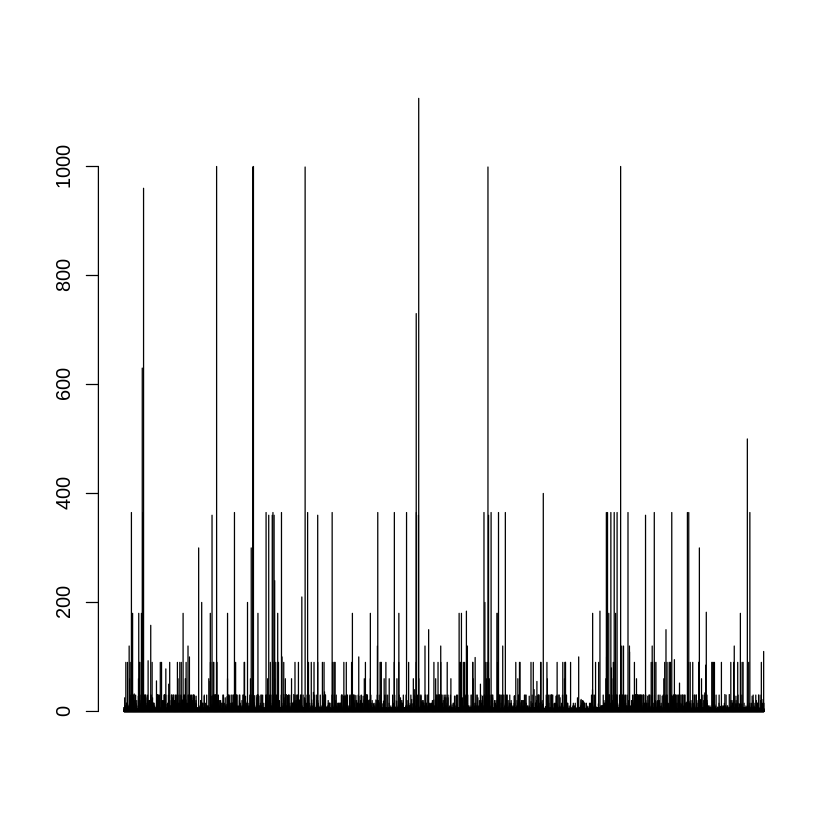

In [ ]:
barplot(df_listing$minimum_nights)

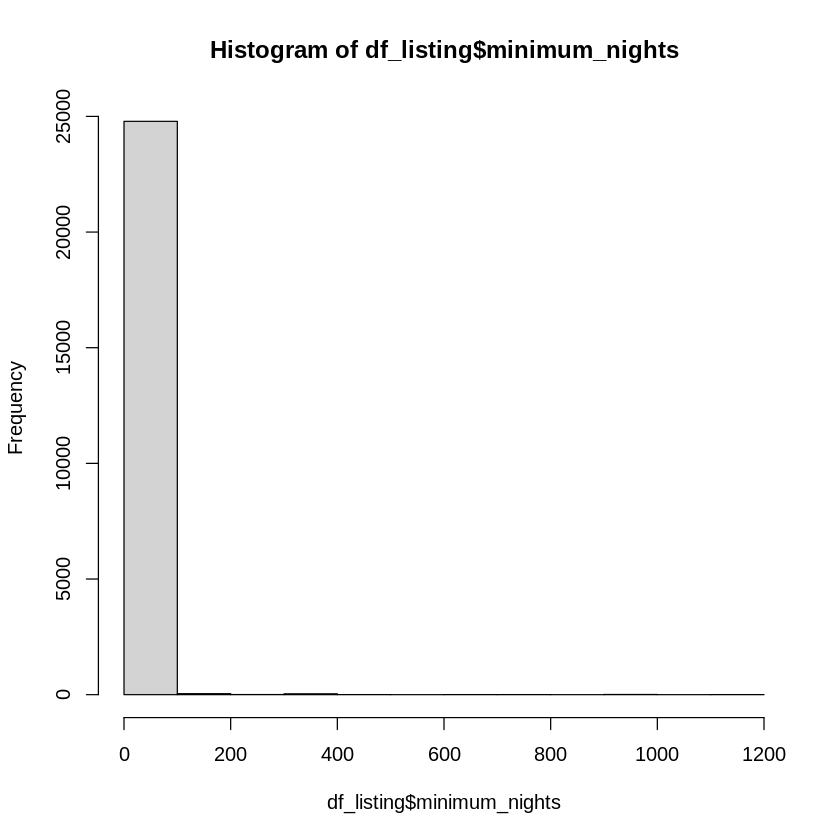

In [ ]:
hist(df_listing$minimum_nights)

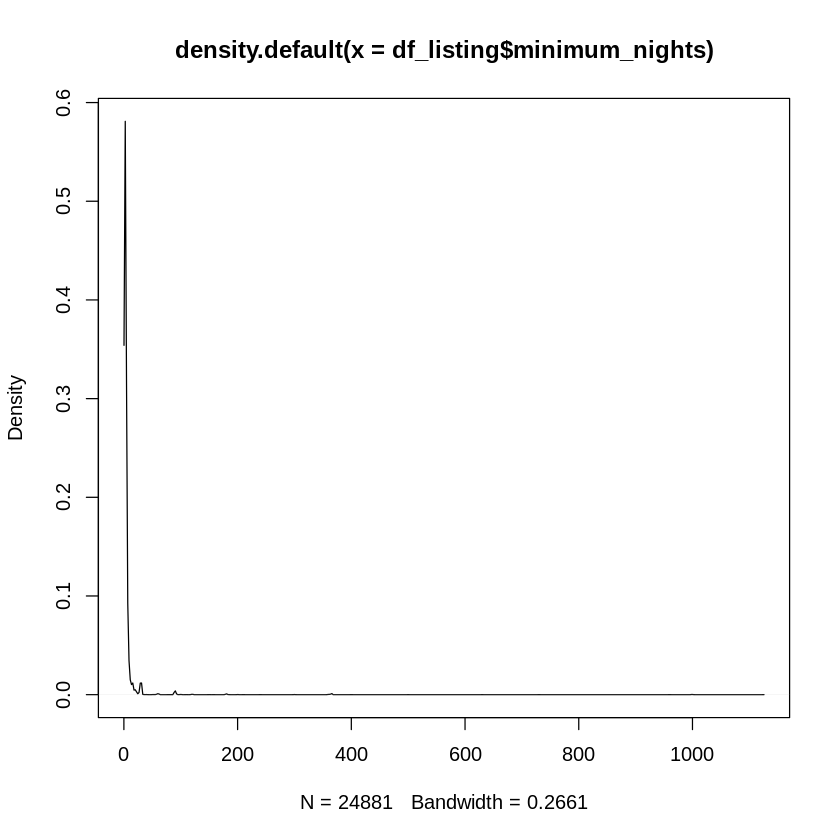

In [ ]:
plot(density(df_listing$minimum_nights))

Maximo de noites

In [ ]:
summary(df_listing$maximum_nights)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    45.0   365.0   566.4  1125.0 47036.0 

In [ ]:
#utilizando o pacote DescTools vamos conseguir facilmente identificar qual o valor que mais aparece entre as opcoes de maximo de noites  (moda) 
Mode(df_listing$maximum_nights)  # 1125 noites representa 3 anos ... 

[1] 1125
attr(,"freq")
[1] 10376

In [ ]:
table(df_listing$maximum_nights)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
   29    28    50    72   154    81   421    78    26   527    14    54    10 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  120   667    17    10    20     5   377    84    10     7     6   110    16 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
   31   214    60  2425   167    27    16     3    45     7     4     4     2 
   40    42    43    44    45    46    47    48    50    55    56    59    60 
  120     3     4     2   109     1     3     1    19     3     3    13   772 
   61    62    63    65    68    69    70    71    75    76    78    79    80 
    6     9     4     8     2     1    15     1     7     1     1     2    33 
   81    82    83    84    85    87    88    89    90    91    92    93    95 
    3     2     1     5    18     2    24   283  1556     9     7     4     5 
   96    99   100   102   105   110   120   121   1

In [ ]:
sd(df_listing$maximum_nights)

[1] 605.6709

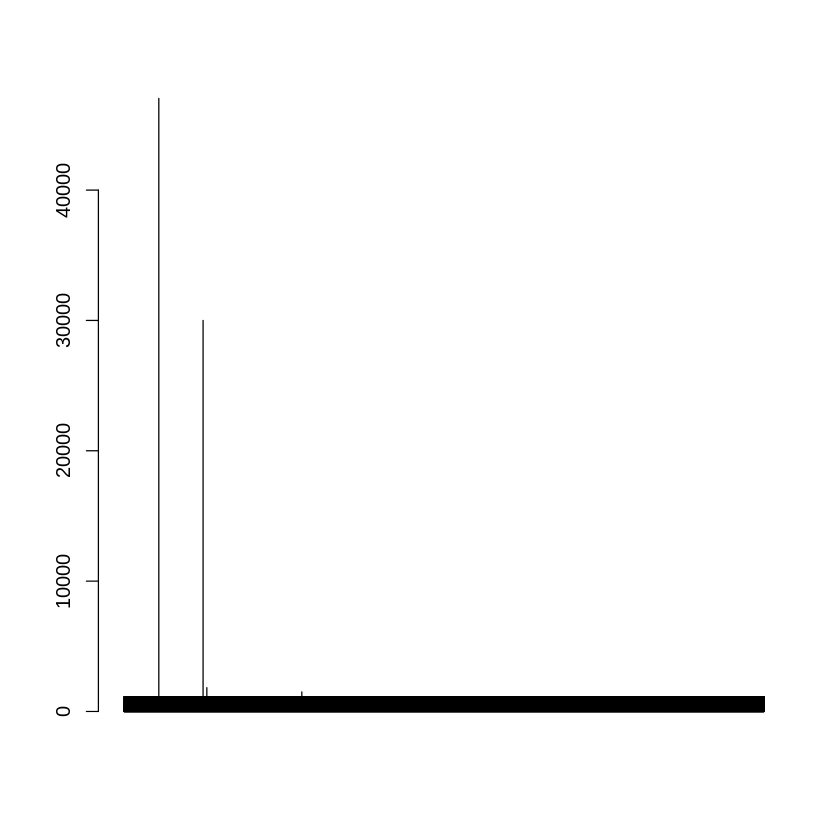

In [ ]:
barplot(df_listing$maximum_nights)

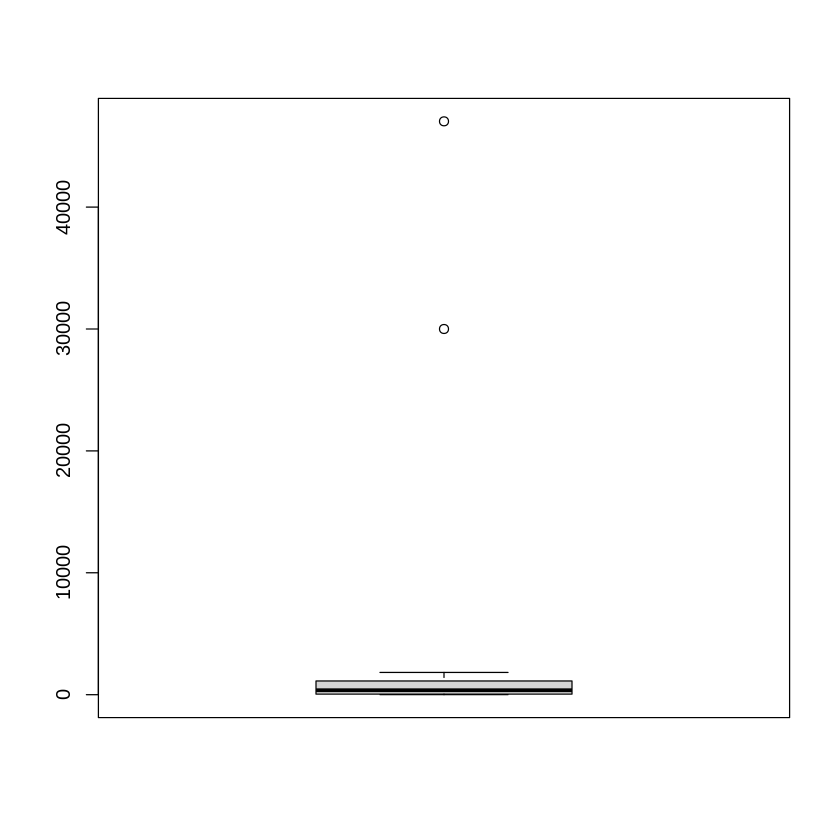

In [ ]:
boxplot(df_listing$maximum_nights)

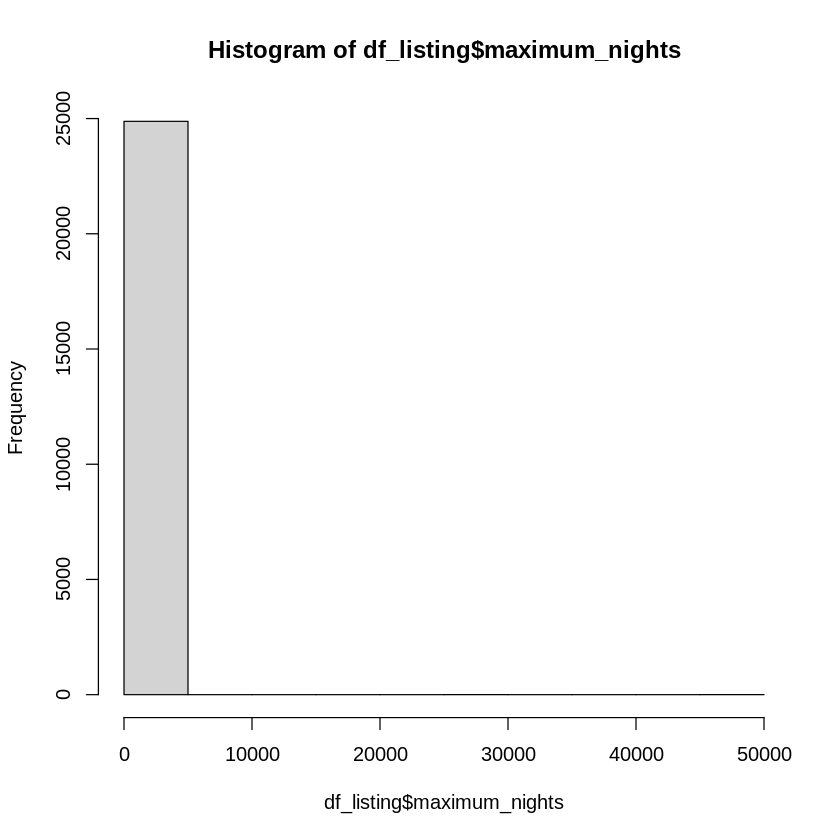

In [ ]:
hist(df_listing$maximum_nights)

Há correlação entre os dados? 

In [ ]:
cor(df_listing$price2,df_listing$maximum_nights)
cor(df_listing$price2,df_listing$minimum_nights)

[1] 0.00174675

[1] 0.01389034